In [1]:
import pandas as pd
import numpy as np

| 欄位名稱                      | 中文翻譯                 | 資料型態或選項 | 原始問卷問題（翻譯） | 原始問卷選項（翻譯）
|:-----------------------------|:------------------------|:------------|------------|---------------|
|Gender                        | 性別                    | - Female<br>- Male | 性別 |- 男<br>- 女
|Age                           | 年齡                    | numeric            | 年齡 |數值
|Height                        | 身高                    | numeric            | 身高 |單位為公尺的數值
|Weight                        | 體重                    | numeric            | 體重 |單位為公斤的數值
|family_history_with_overweight| 家族過重病史            | - yes<br>- no        | 曾有家人有過重的困擾|- 是<br>- 否
|FAVC                          | 經常食用高卡路里食物    | - yes<br>- no         | 經常食用高熱量食物？ | - 是<br>- 否
|FCVC                          | 食用蔬菜的頻率          | numeric              | 各餐中是否經常攝取蔬菜？| - 從不<br>- 偶爾<br>- 總是 
|NCP                           | 每日正餐數              | numeric              | 每日正餐數目|- 1 到 2 餐<br>-  3 餐<br>-  3 餐以上
|CAEC                          | 正餐間飲食              | - no<br>- Sometimes<br>- Frequently<br>- Always| 正餐間會吃東西嗎？|- 無<br>- 偶爾<br>- 經常<br>- 總是
|SMOKE                         | 有無吸煙習慣            | - yes<br>- no        | 抽煙習慣 |- 有<br>- 無
|CH2O                          | 每日飲水量              | numeric             | 每天喝多少水？ |- 少於 1 公升<br>-  1 到 2 公升<br>- 多於 2 公升
|SCC                           | 有無紀錄攝取卡路里的習慣| - yes<br>- no          | 有無紀錄吃下的熱量的習慣？|- 是<br>- 否
|FAF                           | 運動頻率                | numeric             | 多常運動？|- 不運動<br>- 1 到 2 天<br>- 2 到 4 天<br>- 4 到 5 天
|TUE                           | 花在 3C 產品上的時間    | numeric              | 你在手機、電玩、電視、電腦等等科技產品上花多少時間？|- 0-2<br>- 3-5<br>- 5 小時
|CALC                          | 飲酒量                  | - no<br>- Sometimes<br>- Frequently<br>- Always| 飲酒頻率|- 不喝酒<br>- 偶爾<br>- 經常<br>- 總是
|MTRANS                        | 交通方式                | - Automobile<br>- Motorbike<br>- Bike<br>- Public_Transportation<br>- Walking| 你的交通方式|- 汽車<br>- 機車<br>- 腳踏車<br>- 大眾運輸<br>- 步行
|NObeyesdad                    | BMI 評價                | - Insufficient_Weight<br>- Normal_Weight<br>- Overweight_Level_I<br>- Overweight_Level_II<br>- Obesity_Type_I<br>- Obesity_Type_II<br>- Obesity_Type_III

In [2]:
df = pd.read_csv('../data/ObesityDataSet_raw_and_data_sinthetic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [3]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
df = df.drop(['Height', 'Weight'], axis=1)
df.columns

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad'],
      dtype='object')

## 轉化資料類型

ObesityDummyEncoder: 自定義轉換器

**注意！！這個類別的方法設計只用來做 pd.DataFrame.apply 或 pd.Series.apply 用**

In [5]:
class ObesityDummyEncoder:
    
    def __init__(self):
        self.transform_matrix = {
            'male': 0,
            'female': 1,
            'no': 0,
            'yes': 1,
            'sometimes': 1,
            'frequently': 2,
            'always': 3
        }
        self.inverse_transform_matrix = {
            'Gender': {
                0: 'Male',
                1: 'Female'
            },
            'family_history_with_overweight': {
                0: 'no',
                1: 'yes'
            },
            'FAVC': {
                0: 'no',
                1: 'yes'
            },
            'SMOKE': {
                0: 'no',
                1: 'yes'
            },
            'CAEC': {
                0: 'no',
                1: 'Sometimes',
                2: 'Frequently',
                3: 'Always'
            },
            'SCC': {
                0: 'no',
                1: 'yes'
            },
            'CALC': {
                1: 'Sometimes',
                2: 'Frequently'
            }
        }
    
    def transfrom(self, x):
        return self.transform_matrix[x.lower()]
    
    def inverse_transform(self, x, column):
        return self.inverse_transform_matrix[column][x.lower()]

### 轉化二元值資料或是有階層概念的類別型資料

In [6]:
dummy_encoder = ObesityDummyEncoder()

df['Gender'] = df['Gender'].apply(dummy_encoder.transfrom)
df['family_history_with_overweight'] = df['family_history_with_overweight'].apply(dummy_encoder.transfrom)
df['FAVC'] = df['FAVC'].apply(dummy_encoder.transfrom)
df['CAEC'] = df['CAEC'].apply(dummy_encoder.transfrom)
df['SMOKE'] = df['SMOKE'].apply(dummy_encoder.transfrom)
df['SCC'] = df['SCC'].apply(dummy_encoder.transfrom)
df['CALC'] = df['CALC'].apply(dummy_encoder.transfrom)

df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Public_Transportation,Normal_Weight
1,1,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Public_Transportation,Normal_Weight
2,0,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Public_Transportation,Normal_Weight
3,0,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Walking,Overweight_Level_I
4,0,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Public_Transportation,Overweight_Level_II


### MTRANS 沒有階層概念，需要個別編碼

至少我這麼認為——交通方式的選擇不帶有等級的概念。

In [7]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
mtrans = pd.DataFrame(lb.fit_transform(df.MTRANS),
                      columns=['MTRANS1', 'MTRANS2', 'MTRANS3', 'MTRANS4', 'MTRANS5'])

df = pd.concat([df.drop(columns='MTRANS'), 
                mtrans.iloc[:, 1:]],   # n - 1 columns is enough
                axis=1)

df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS2,MTRANS3,MTRANS4,MTRANS5
0,1,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Normal_Weight,0,0,1,0
1,1,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Normal_Weight,0,0,1,0
2,0,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Normal_Weight,0,0,1,0
3,0,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Overweight_Level_I,0,0,0,1
4,0,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Overweight_Level_II,0,0,1,0


決策樹與隨機森林不得益於標準化，前處理做到這一步就好。

In [8]:
df2 = df.copy()
df2['NObeyesdad'] = df2['NObeyesdad'].apply(lambda x: {'Insufficient_Weight': 0,
                                                       'Normal_Weight': 1,
                                                       'Overweight_Level_I': 2,
                                                       'Overweight_Level_II': 3,
                                                       'Obesity_Type_I': 4,
                                                       'Obesity_Type_II': 5,
                                                       'Obesity_Type_III': 6}[x])

In [9]:
df2.describe()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS2,MTRANS3,MTRANS4,MTRANS5
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.494079,24.312600,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,3.112269,0.003316,0.005211,0.748460,0.026528
std,0.500083,6.345968,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.985062,0.057502,0.072015,0.434001,0.160737
min,0.000000,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,22.777890,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,26.000000,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,5.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,61.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000


### 分離測試集、訓練集

三成做測試，七成做訓練。

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['NObeyesdad'], axis=1), df['NObeyesdad'], test_size=.3)

要不要做 k-fold validation 啊？

## 決策樹（ decision tree ）

In [11]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

tree.score(X_test, y_test)

0.7460567823343849

這棵樹可以成功分辨出大約 78% 的真實身體質量等級

### 視覺化決策樹

使用第三方套件 graphviz 來畫圖，成品比較漂亮外也快很多

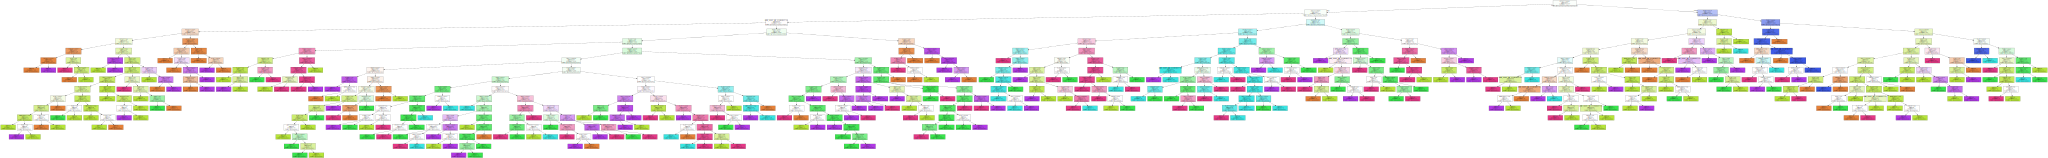

In [12]:
from sklearn.tree import export_graphviz
import graphviz

dot = export_graphviz(tree, feature_names=df.keys().drop('NObeyesdad'), filled=True)
graphviz.Source(dot)

存入硬碟

In [13]:
export_graphviz(tree, out_file='raw_tree.dot', feature_names=df.keys().drop('NObeyesdad'), filled=True)

## 隨機森林（ Random Forest ）

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1)
forest.fit(X_train, y_train)

forest.score(X_test, y_test)

0.8643533123028391

正確率約是 86%